In [1]:
import pandas as pd

In [4]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Downloads/height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [7]:
df.shape

(23, 2)

<Axes: xlabel='Height', ylabel='Weight'>

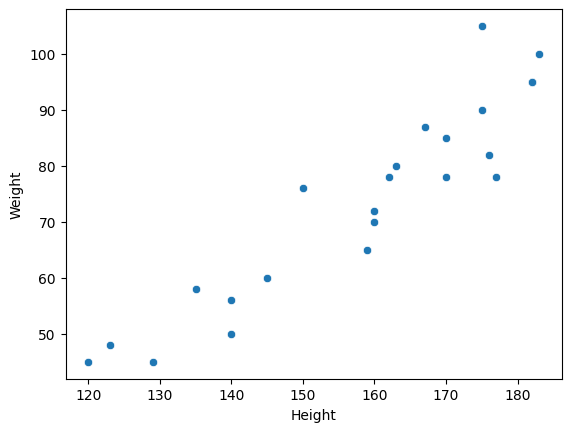

In [10]:
sns.scatterplot(x=df.Height,y=df.Weight)

In [11]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


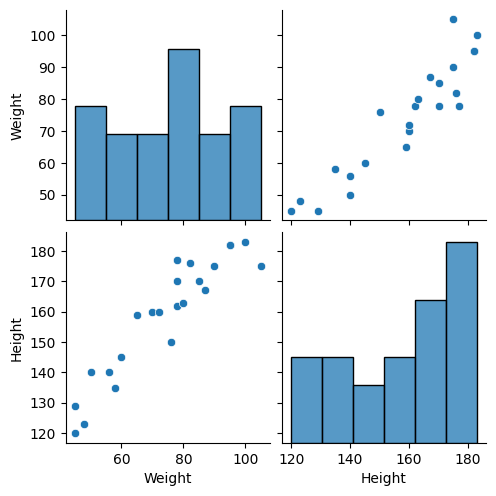

In [12]:
sns.pairplot(df)

In [13]:
X=df[['Weight']]
y=df['Height']

In [20]:
y.shape

(23,)

In [21]:
X_series.shape

(23,)

In [22]:
X.shape

(23, 1)

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
X_train=scaler.fit_transform(X_train)

In [29]:
X_test=scaler.transform(X_test)

In [30]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regression=LinearRegression(n_jobs=-1)

In [33]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [34]:
print("Coefficient or slope: ",regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficient or slope:  [17.2982057]
Intercept:  156.47058823529412


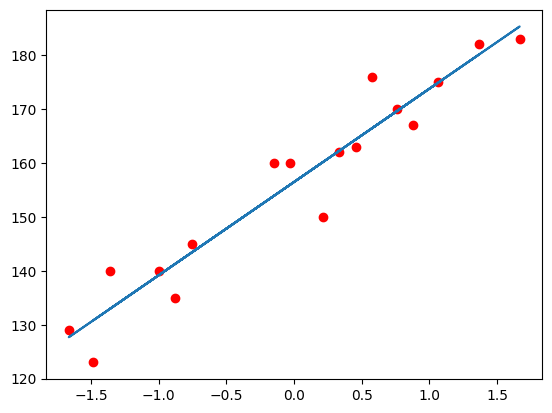

In [39]:
plt.scatter(X_train,y_train,c='red')
plt.plot(X_train,regression.predict(X_train))

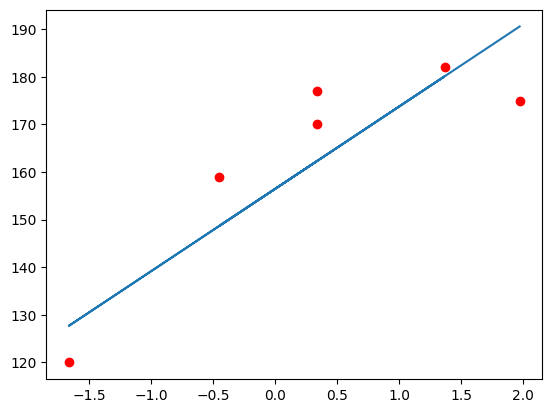

In [40]:
plt.scatter(X_test,y_test,c='red')
plt.plot(X_test,regression.predict(X_test))

In [41]:
y_pred=regression.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [44]:
df=pd.read_csv("Downloads/economic_index.csv")

In [45]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [49]:
df=df.drop(['year','month','Unnamed: 0'],axis=1)

In [51]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [52]:
corr=df.corr()

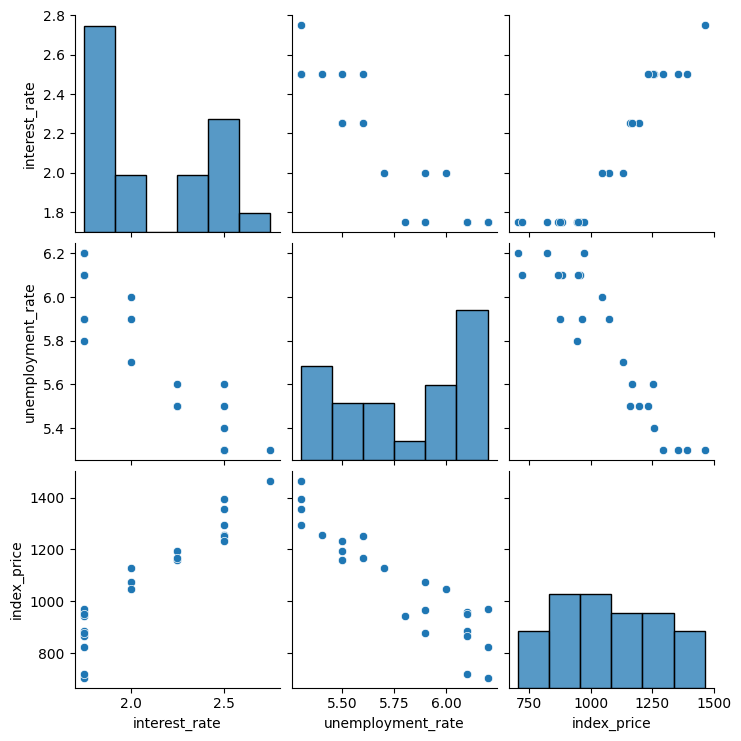

In [53]:
sns.pairplot(df)

<Axes: >

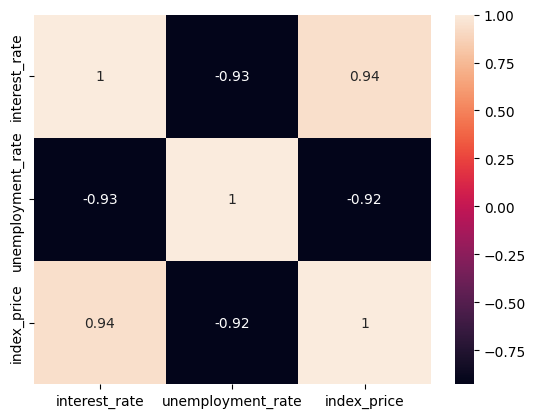

In [55]:
sns.heatmap(corr, annot=True)

In [56]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [58]:
X=df.drop(['index_price'],axis=1)
y=df['index_price']

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

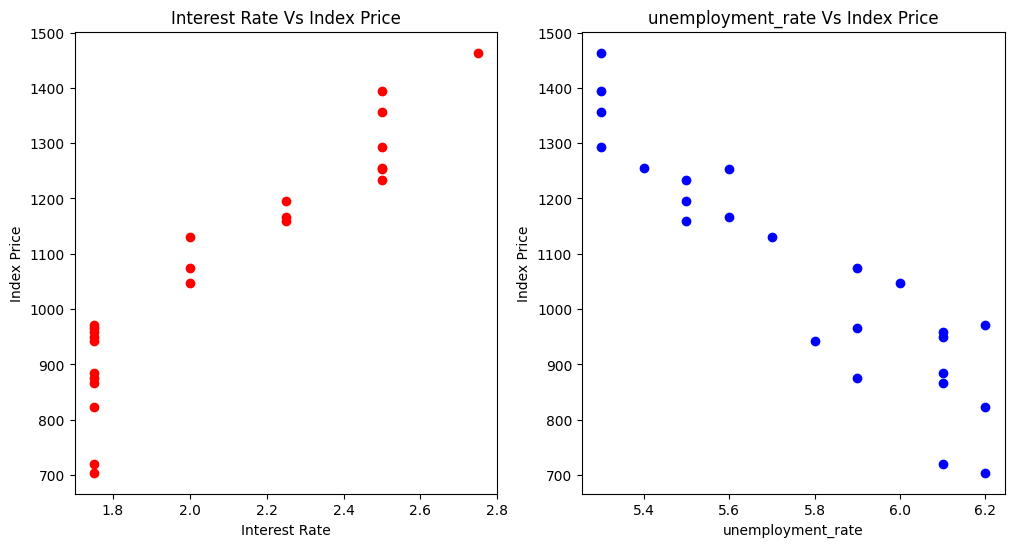

In [62]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.scatter(df['interest_rate'], df['index_price'], c = 'red')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.title('Interest Rate Vs Index Price')
plt.subplot(1,2,2)
plt.scatter(df['unemployment_rate'], df['index_price'], c = 'blue')
plt.xlabel('unemployment_rate')
plt.ylabel('Index Price')
plt.title('unemployment_rate Vs Index Price')
plt.show()

<Axes: xlabel='interest_rate', ylabel='index_price'>

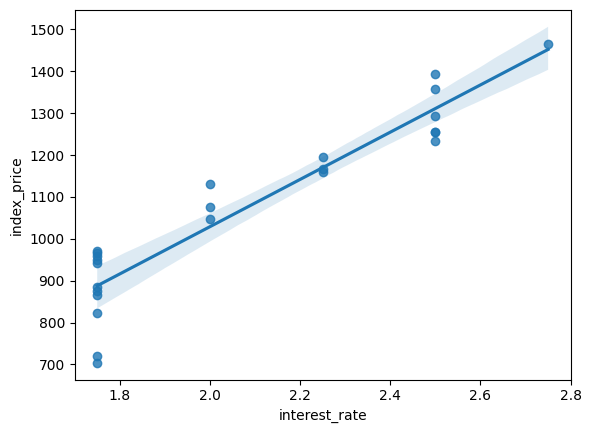

In [63]:
sns.regplot(x=df.interest_rate,y=df.index_price)

In [66]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [67]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [71]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error',cv=3)

In [72]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [73]:
y_pred=regression.predict(X_test)

In [74]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [75]:
print("Coefficient or slope: ",regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficient or slope:  [  88.27275507 -116.25716066]
Intercept:  1053.4444444444443


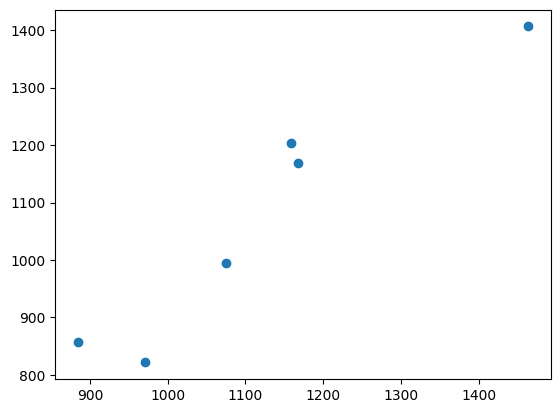

In [76]:
plt.scatter(y_test,y_pred)

In [77]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


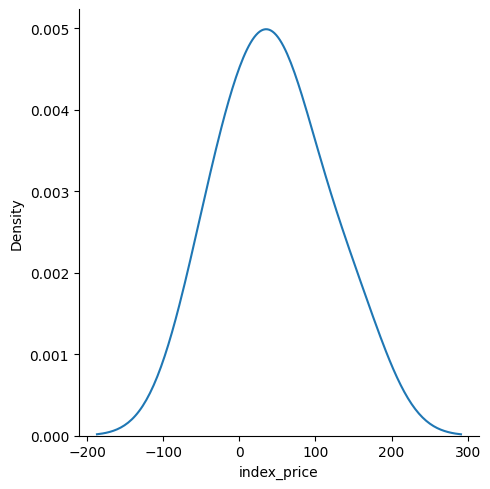

In [78]:
sns.displot(residuals,kind='kde')

Text(0, 0.5, 'residuals')

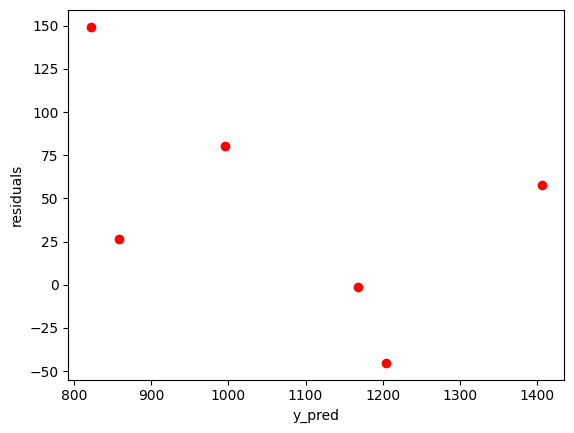

In [80]:
plt.scatter(y_pred,residuals,c='red')
plt.xlabel("y_pred")
plt.ylabel("residuals")

Text(0, 0.5, 'Y dataset')

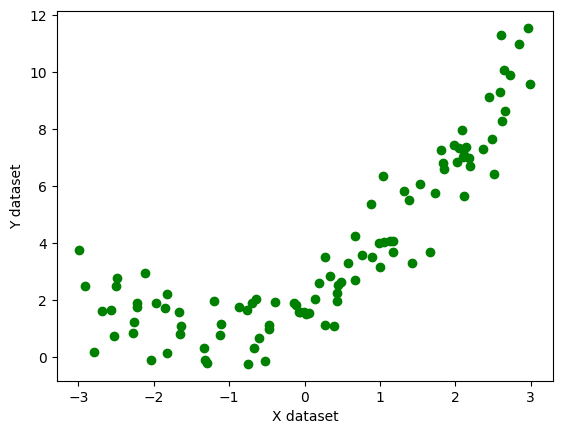

In [82]:
X=6*np.random.rand(100,1)-3
y=0.5*X**2 + 1.5*X + 2+ np.random.randn(100,1)
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
regression_1=LinearRegression()

In [85]:
regression_1.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


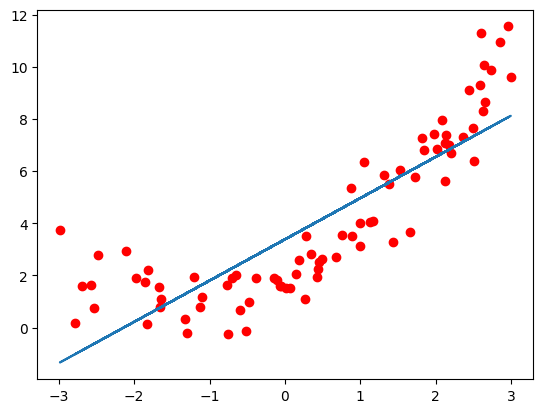

In [87]:
plt.scatter(X_train,y_train,c='red')
plt.plot(X_train,regression_1.predict(X_train))

In [89]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [95]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8940079107994492


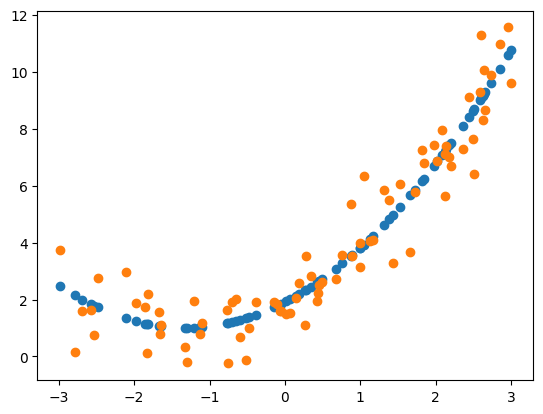

In [102]:

plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [103]:
print("Coefficient or slope: ",regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficient or slope:  [[0.         1.38055807 0.52468097]]
Intercept:  [1.91551]


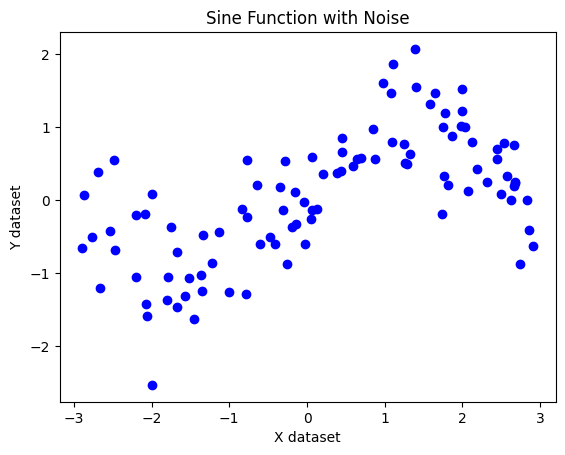

In [105]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(100, 1) - 3

y = np.sin(X) + np.random.randn(100, 1) * 0.5  
plt.scatter(X, y, color='b')  
plt.xlabel('X dataset')
plt.ylabel('Y dataset')
plt.title('Sine Function with Noise')
plt.show()

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [109]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [110]:
regression=LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.32013841179590397


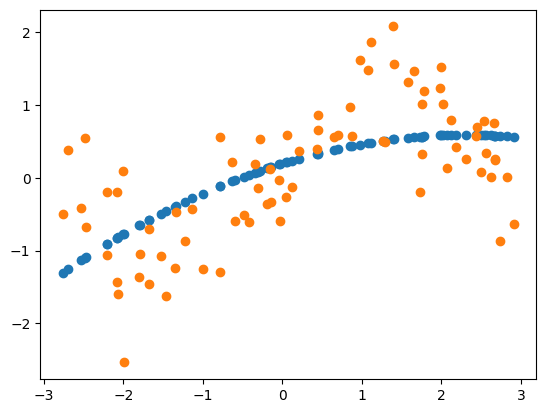

In [111]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

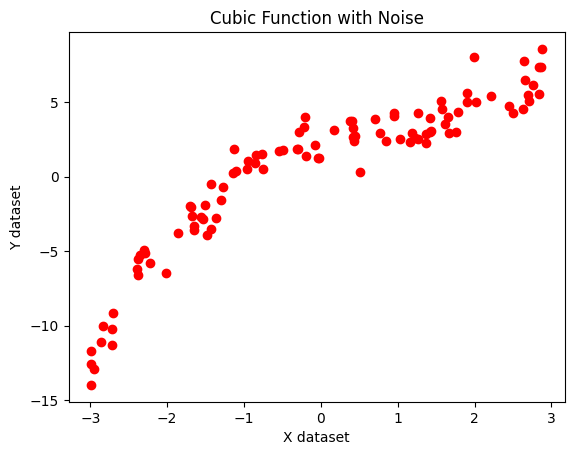

In [112]:
X = 6 * np.random.rand(100, 1) - 3

# Generate Y values as a cubic function of X
y = 0.2 * X**3 - 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)  # Adding some noise for variability

# Plot the data
plt.scatter(X, y, color='r')  # Using red color for the cubic function
plt.xlabel('X dataset')
plt.ylabel('Y dataset')
plt.title('Cubic Function with Noise')
plt.show()


In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [115]:
regression=LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.7823084431496908


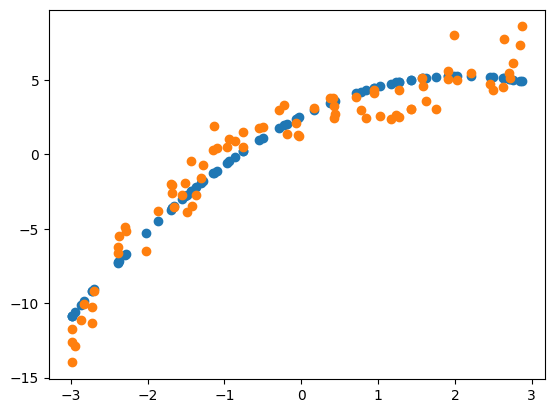

In [116]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

Coefficient or slope:  [[ 0.          2.61768403 -0.62508323]]
Intercept:  [2.55306009]


In [123]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

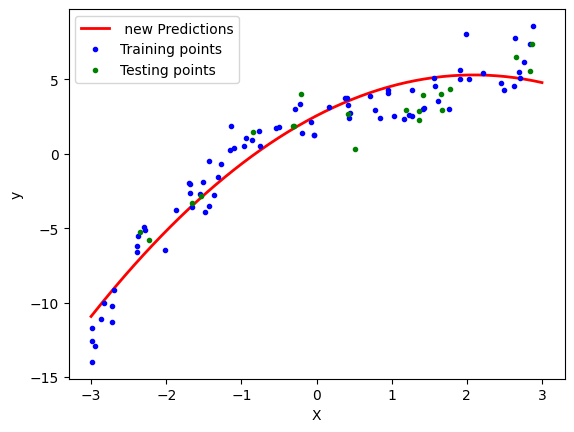

In [127]:
y_new=regression.predict(X_new_poly)
plt.plot(X_new, y_new,"r-", linewidth=2,label=" new Predictions")
plt.plot(X_train, y_train, "b.", label = "Training points")
plt.plot(X_test, y_test, "g." , label = "Testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [118]:
from sklearn.pipeline import Pipeline

In [145]:
def poly_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)

    poly_features=s=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
         ("poly_features",poly_features),
         ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train)
    y_pred_new = poly_regression.predict(X_new)
    plt.plot(X_new, y_pred_new, 'r' , label = 'Degree ' + str(degree), linewidth = 2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g." , linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4,0,10])
    plt.show()

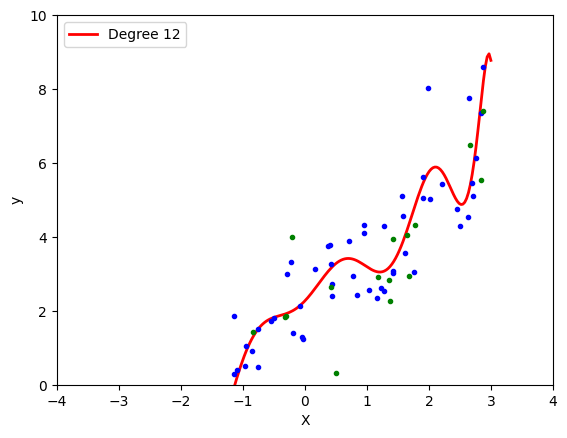

None


In [150]:
print(poly_regression(12))

In [151]:
df=pd.read_csv("Downloads/50_Startups.csv")